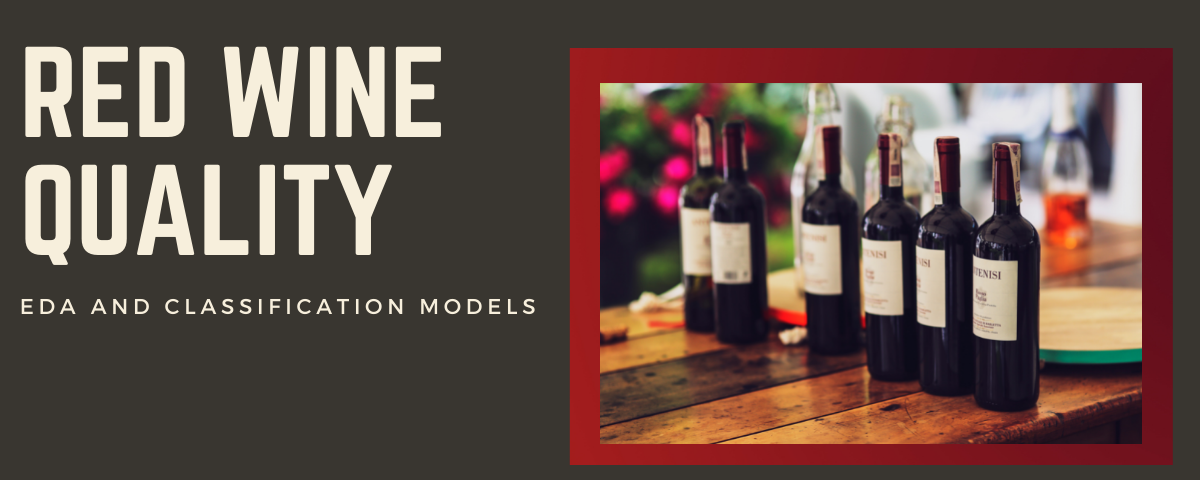

In [ ]:
import numpy as np
import pandas as pd
from pandas import DataFrame

import sklearn

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
%matplotlib inline

import missingno
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")

# READING DATA 

In [ ]:
wine_df = pd.read_csv('../input/red-wine-quality-cortez-et-al-2009/winequality-red.csv')
wine_df.head()

# DATA OVERVIEW

In [ ]:
wine_df.info()

In [ ]:
wine_df.describe()

In [ ]:
wine_df.isna().sum()

**Conclusion: There are no null values in the dataset hence I am going to skip the missing value analysis and missing value imputation part.**

# DATA VISUALIZAION

**At first, we are going to look one-by-one into the column and the relation between the quality of wine.**

In [ ]:
wine_df.hist(bins=10,figsize=(15,12))
plt.show()

**Conclusion :**

**FIXED ACID** - This is a total of most acids involved with wine or fixed or nonvolatile. It resembles a bell shaped, normal distribution graph.the maximum count goes somewhat around 7.5.

**VOLATILE ACID** - This attribute gives the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste. The graph resembles the bell shaped , like a normal dirstibution. Majority of wines have values between [0.3, 0.72].

**CITRIC ACID** - Found in small quantities, citric acid can add ‘freshness’ and flavor to wines. There are two peaks appearing in the graph, one near 0.02 and other near 0.25.

**RESIDUAL SUGAR** - It is the amount of sugar remaining after fermentation stops. The graph for residual sugar is positively i.e left skewed. Majority of wines have lower than 2.5 residual sugar value.

**CHLORIDES** - Chlorides gives the amount of salt in the wine. Most of the wines have lesser than 0.2 chloride value.

**FREE SO2** - Free sulfur dioxide prevents microbial growth and the oxidation of wine. Most of the wines have lesser than 20 free SO2 value.

**TOTAL SO2** -Represents the amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 mg/L, SO2 becomes evident in the nose and taste of wine. The graph appears to be left skewed and most of the wines have lesser than 50 total SO2 value.

**DENSITY** - Density plot looks normally distributed, with mean eqals to 0.9967 and median equals to 0.9968.

**pH** - This attribute describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic), where 7 is neutral.The graph appears to be quiet normally distributed. Most of the wines have a pH level ranging between [3.2, 3.4].

**SULPHATE** - This is a wine additive which can contribute to sulfur dioxide gas (S02) levels and acts as an antimicrobial and antioxidant. It also resembles a bell shaped graph with maximum wines having around 6.5 sulphates value.

**ALCOHOL CONTENT** - The graph of alcohol content appears to be positively i.e left skewed and most of them are below 11% mark.


**QUALITY** - The wines in this dataset belong to the range[3,8] and most of them belong to 5.



In [ ]:
plt.figure(figsize=(15,10))
correlation = wine_df.corr()
sns.heatmap(correlation,annot=True,cmap='viridis')

In [ ]:
correlation['quality'].sort_values(ascending=False)

The above results shows the measure of correlation between quality and other columns. It can be deduced that alcohol has highest correlation value. After that we have sulphates, citric acid, fixed acidity and residual sugar. </br>
**Let's have a closer look on these factors.**

**Alcohol - Quality Heatmap**

In [ ]:
fig = px.density_heatmap(wine_df, x="alcohol", y="quality", nbinsx=20, nbinsy=10, color_continuous_scale="thermal")
fig.show()

Conclusion - The alcohol range between [9,10] and quality equal to 5 accounts for highest number of wines. As we move upwards in the quality, wines having higher alcohol content increses, while in the lower quality, the alcohol content also decreases. The optimum range of alcohol seems to be between [10.5,12.5].

In [ ]:
fig = px.density_heatmap(wine_df, x="sulphates", y="quality", nbinsx=30, nbinsy=10, color_continuous_scale="thermal")
fig.show()

Conclusion - The sulphates range between [0.5,0.7] and quality equal to [5,6] accounts for highest number of wines. As we move upwards in the quality, wines having sulphate content around 0.8 increses, while in the lower quality, the sulphate  content is around 0.5.

In [ ]:
fig = px.density_heatmap(wine_df, x="citric acid", y="quality", nbinsx=30, nbinsy=10,color_continuous_scale="thermal")
fig.show()

In [ ]:
fig = px.density_heatmap(wine_df, x="fixed acidity", y="quality", nbinsx=30, nbinsy=10, color_continuous_scale="thermal")
fig.show()

Conclusion - Many wines fall under the category having fixed acidity the range between [7,8] and the quality from [5,6]. 

## Categorizing the wine quality 

In [ ]:
categor_condn=[ (wine_df['quality']>=7),
               (wine_df['quality']<=4)]
rating=['superior','inferior']
wine_df['rating'] = np.select(categor_condn,rating,default='fine')

wine_df.head()

In [ ]:
wine_df['rating'].value_counts()

In [ ]:
wine_df.groupby('rating').mean()

In [ ]:
fig = px.histogram(wine_df, x="alcohol", color="rating",marginal="violin")
fig.update_traces(opacity=0.85)
fig.show()


Conclusion -  The above plot shows the distribution of alcohol content with respect to the reviews. We can see that the wines of superior quality have a higher percentage of alcohol content while the wines of inferior quality have lower percentage of alcohol content.

In [ ]:
fig = px.scatter(wine_df, x="free sulfur dioxide", y="total sulfur dioxide", color="rating",
                 facet_col="rating", title="Total SO2, free SO2 Vs Rating")

fig.update_xaxes(showgrid=False)

fig.show()

**Conclusion - Most of the superior quality wines are below the 75 mg/dm3 total sulfur dioxide concentration and,below the 30 mg/dm3 free sulfur dioxide concentration.**

In [ ]:
fig = px.scatter(wine_df, x="volatile acidity", y="alcohol", color="rating",
                 facet_col="rating", title="Alcohol, Volatile Alcohol Vs Rating")

fig.update_xaxes(showgrid=False)

fig.show()

**Conclusion - The combinations with high alcohol percent and low volatie acidity seems to produce better wines.**

# MODEL BUILDING

In [ ]:
categor_condn=[ 
               (wine_df['quality']<=5)]
rating=['inferior']
wine_df['rating'] = np.select(categor_condn,rating,default='fine')

wine_df.head()

In [ ]:
wine_df = wine_df.drop(['quality'], axis='columns')
wine_df.head()

In [ ]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
wine_df['rating'] = labelencoder_y.fit_transform(wine_df['rating'])

In [ ]:
X = wine_df.drop('rating', axis = 1).values
y = wine_df['rating'].values.reshape(-1,1)

## Splitting into train and test

In [ ]:
#splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=50)

## Feature scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.fit_transform(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
# To store the accuracy result of all the models
results =[]

# 1. Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_LR = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
model_LR.fit(X_train_scale, y_train.ravel())

In [ ]:
cv_score_LR = cross_val_score(estimator = model_LR, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('LOGISTIC REGRESSION REPORT')
print("CV Score: ", cv_score_LR.mean())

y_train_predict_LR = model_LR.predict(X_train_scale)
train_accuracy_LR = accuracy_score(y_train, y_train_predict_LR)
print("Training set accuracy: ", train_accuracy_LR)

y_test_predict_LR = model_LR.predict(X_test_scale)
test_accuracy_LR = accuracy_score(y_test, y_test_predict_LR)
print("Test set accuracy: ", test_accuracy_LR)

results.append(test_accuracy_LR)

In [ ]:
confusion_matrix(y_test, y_test_predict_LR)

## 2.KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 32, weights = 'distance')
model_KNN.fit(X_train_scale, y_train.ravel())

In [ ]:
cv_score_KNN = cross_val_score(estimator = model_KNN, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('KNN REPORT')
print("CV Score: ", cv_score_KNN.mean())

y_train_predict_KNN = model_KNN.predict(X_train_scale)
train_accuracy_KNN = accuracy_score(y_train, y_train_predict_KNN)
print("Training set accuracy: ", train_accuracy_KNN)

y_test_predict_KNN = model_KNN.predict(X_test_scale)
test_accuracy_KNN = accuracy_score(y_test, y_test_predict_KNN)
print("Test set accuracy: ", test_accuracy_KNN)

results.append(test_accuracy_KNN)

In [ ]:
confusion_matrix(y_test, y_test_predict_KNN)


## 3.Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(criterion = 'gini', max_features=6, max_leaf_nodes=400, random_state = 33)
model_DT.fit(X_train_scale, y_train.ravel())

In [ ]:
cv_score_DT = cross_val_score(estimator = model_DT, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('DT REPORT')
print("CV Score: ", cv_score_DT.mean())

y_train_predict_DT = model_DT.predict(X_train_scale)
train_accuracy_DT = accuracy_score(y_train, y_train_predict_DT)
print("Training set accuracy: ", train_accuracy_DT)

y_test_predict_DT = model_DT.predict(X_test_scale)
test_accuracy_DT = accuracy_score(y_test, y_test_predict_DT)
print("Test set accuracy: ", test_accuracy_DT)

results.append(test_accuracy_DT)

In [ ]:
confusion_matrix(y_test, y_test_predict_DT)

## 4.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_RF = RandomForestClassifier(criterion = 'entropy', max_features = 4, n_estimators = 900, random_state=40)
model_RF.fit(X_train_scale, y_train.ravel())

In [ ]:
cv_score_RF = cross_val_score(estimator = model_RF, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('RF REPORT')
print("CV Score: ", cv_score_RF.mean())

y_train_predict_RF = model_RF.predict(X_train_scale)
train_accuracy_RF = accuracy_score(y_train, y_train_predict_RF)
print("Training set accuracy: ", train_accuracy_RF)

y_test_predict_RF = model_RF.predict(X_test_scale)
test_accuracy_RF = accuracy_score(y_test, y_test_predict_RF)
print("Test set accuracy: ", test_accuracy_RF)

results.append(test_accuracy_RF)

In [ ]:
confusion_matrix(y_test, y_test_predict_RF)

## 5.SVM

In [ ]:
from sklearn.svm import SVC
model_SVC = SVC()
model_SVC.fit(X_train_scale, y_train.ravel())

In [ ]:
cv_score_SVC = cross_val_score(estimator = model_SVC, X = X_train_scale, y = y_train.ravel(), cv = 10)
print('SVC REPORT')
print("CV Score: ", cv_score_SVC.mean())

y_train_predict_SVC = model_SVC.predict(X_train_scale)
train_accuracy_SVC = accuracy_score(y_train, y_train_predict_SVC)
print("Training set accuracy: ", train_accuracy_SVC)

y_test_predict_SVC = model_SVC.predict(X_test_scale)
test_accuracy_SVC = accuracy_score(y_test, y_test_predict_SVC)
print("Test set accuracy: ", test_accuracy_SVC)

results.append(test_accuracy_SVC)

In [ ]:
confusion_matrix(y_test, y_test_predict_SVC)

In [ ]:
result_df = DataFrame({"ML Models":["Logistic Regression","KNN",
             "Decision Tree","Random Forest","SVC"],"Score":results})

In [ ]:
result_df.style.background_gradient("Blues")

In [ ]:
g = sns.barplot("Score", "ML Models", data = result_df, palette='Blues')
g.set_xlabel("Score")
g.set_title("Model Accuracy Results", color = "Black")
plt.show()

## END NOTE:
There are some special noebooks on this particular topic whic I would like to mention for I got to learn a lot from them:
https://www.kaggle.com/rafetcan/red-wine-quality-classification-95-76-acc/notebook - 